In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from scipy.stats import wilcoxon
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

In [2]:
ID             = [11, 3, 4, 5, 6, 7, 15, 16]
yeeg           = []
Xeeg           = []
pred_y_eeg     = []
clf_eeg        = []

yemg           = []
Xemg           = []
pred_y_emg     = []
clf_emg        = []


yeeg_emg       = []
Xeeg_emg       = []
pred_y_eeg_emg = []
clf_eeg_emg    = []


for i in ID:
    yeeg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\yeeg.npy'))
    Xeeg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Xeeg.npy'))
    pred_y_eeg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\pred_yeeg.npy'))
    clf_eeg.append(pickle.load(open(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Clfeeg', "rb")))
    
    yemg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\yemg.npy'))
    Xemg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Xemg.npy'))
    pred_y_emg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\pred_yemg.npy'))
    clf_emg.append(pickle.load(open(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Clfemg', "rb")))
    
    yeeg_emg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\yeeg_emg.npy'))
    Xeeg_emg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Xeeg_emg.npy'))
    pred_y_eeg_emg.append(np.load(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\pred_yeeg_emg.npy'))
    clf_eeg_emg.append(pickle.load(open(f'C:/Users/willy/OneDrive/Documents/GitHub/Intent-to-interact/data/{i}/\Clfeeg_emg', "rb")))

In [3]:
cm_eeg     = []
cm_emg     = []
cm_eeg_emg = []

for i in range(len(ID)):
    cm_eeg.append(confusion_matrix(y_true=yeeg[i], y_pred=pred_y_eeg[i]))
    cm_emg.append(confusion_matrix(y_true=yemg[i], y_pred=pred_y_emg[i]))
    cm_eeg_emg.append(confusion_matrix(y_true=yeeg_emg[i], y_pred=pred_y_eeg_emg[i]))

mean_cm_eeg     = np.zeros((2, 2))
std_cm_eeg      = np.zeros((2, 2))
mean_cm_emg     = np.zeros((2, 2))
std_cm_emg      = np.zeros((2, 2))
mean_cm_eeg_emg = np.zeros((2, 2))
std_cm_eeg_emg  = np.zeros((2, 2))


for j in range(mean_cm_eeg.shape[0]):
    for i in range(mean_cm_eeg.shape[1]):
        mean_cm_eeg[i, j] = np.mean(np.asarray(cm_eeg)[:, i, j])
        std_cm_eeg[i, j]  = np.std(np.asarray(cm_eeg)[:, i, j])
        
        mean_cm_emg[i, j] = np.mean(np.asarray(cm_emg)[:, i, j])
        std_cm_emg[i, j]  = np.std(np.asarray(cm_emg)[:, i, j])
        
        mean_cm_eeg_emg[i, j] = np.mean(np.asarray(cm_eeg_emg)[:, i, j])
        std_cm_eeg_emg[i, j]  = np.std(np.asarray(cm_eeg_emg)[:, i, j])

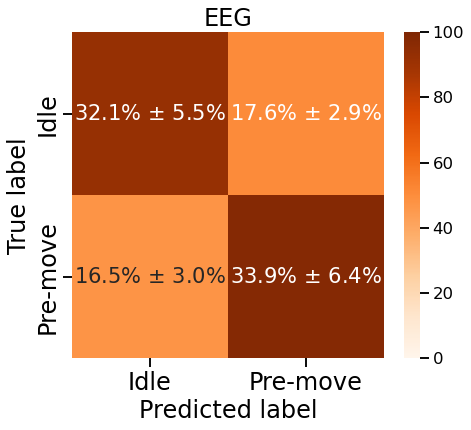

In [4]:
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
a = sns.heatmap(mean_cm_eeg, ax = ax, annot=np.array([[f'{round(mean_cm_eeg[0,0]/np.sum(mean_cm_eeg)*100,1)}% $\pm$ {round(std_cm_eeg[0,0]/np.sum(mean_cm_eeg)*100,1)}%',
                                                       f'{round(mean_cm_eeg[0,1]/np.sum(mean_cm_eeg)*100,1)}% $\pm$ {round(std_cm_eeg[0,1]/np.sum(mean_cm_eeg)*100,1)}%'],
                                                      [f'{round(mean_cm_eeg[1,0]/np.sum(mean_cm_eeg)*100,1)}% $\pm$ {round(std_cm_eeg[1,0]/np.sum(mean_cm_eeg)*100,1)}%',
                                                       f'{round(mean_cm_eeg[1,1]/np.sum(mean_cm_eeg)*100,1)}% $\pm$ {round(std_cm_eeg[1,1]/np.sum(mean_cm_eeg)*100,1)}%']]),
                                                cmap='Oranges', fmt="", vmin=0, vmax=100, annot_kws={"size":21},
                                            xticklabels=["Idle", "Pre-move"], yticklabels=["Idle", "Pre-move"])
a.set_title('EEG', fontsize=24)
a.set_ylabel('True label', fontsize=24)
a.set_xlabel('Predicted label', fontsize=24)
a.tick_params(labelsize=24)

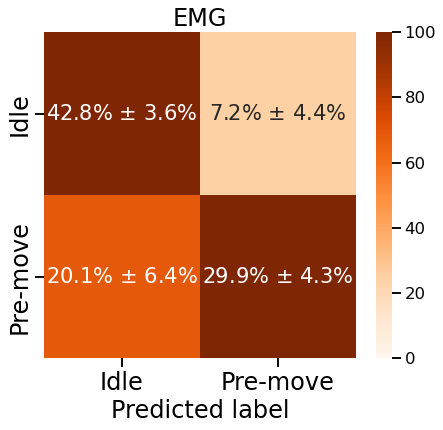

In [5]:
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
a = sns.heatmap(mean_cm_emg, ax = ax, annot=np.array([[f'{round(mean_cm_emg[0,0]/np.sum(mean_cm_emg)*100,1)}% $\pm$ {round(std_cm_emg[0,0]/np.sum(mean_cm_emg)*100,1)}%',
                                                       f'{round(mean_cm_emg[0,1]/np.sum(mean_cm_emg)*100,1)}% $\pm$ {round(std_cm_emg[0,1]/np.sum(mean_cm_emg)*100,1)}%'],
                                                      [f'{round(mean_cm_emg[1,0]/np.sum(mean_cm_emg)*100,1)}% $\pm$ {round(std_cm_emg[1,0]/np.sum(mean_cm_emg)*100,1)}%',
                                                       f'{round(mean_cm_emg[1,1]/np.sum(mean_cm_emg)*100,1)}% $\pm$ {round(std_cm_emg[1,1]/np.sum(mean_cm_emg)*100,1)}%']]),
                                                cmap='Oranges', fmt="", vmin=0, vmax=100, annot_kws={"size":21},
                                            xticklabels=["Idle", "Pre-move"], yticklabels=["Idle", "Pre-move"])
a.set_title('EMG', fontsize=24)
a.set_ylabel(None, fontsize=24)
a.set_xlabel('Predicted label', fontsize=24)
a.tick_params(labelsize=24)

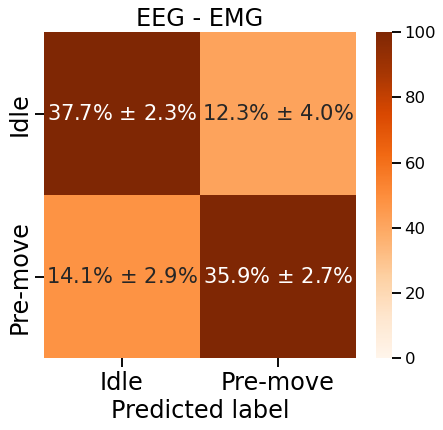

In [6]:
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
a = sns.heatmap(mean_cm_eeg_emg, ax = ax, annot=np.array([[f'{round(mean_cm_eeg_emg[0,0]/np.sum(mean_cm_eeg_emg)*100,1)}% $\pm$ {round(std_cm_eeg_emg[0,0]/np.sum(mean_cm_eeg_emg)*100,1)}%',
                                                       f'{round(mean_cm_eeg_emg[0,1]/np.sum(mean_cm_eeg_emg)*100,1)}% $\pm$ {round(std_cm_eeg_emg[0,1]/np.sum(mean_cm_eeg_emg)*100,1)}%'],
                                                      [f'{round(mean_cm_eeg_emg[1,0]/np.sum(mean_cm_eeg_emg)*100,1)}% $\pm$ {round(std_cm_eeg_emg[1,0]/np.sum(mean_cm_eeg_emg)*100,1)}%',
                                                       f'{round(mean_cm_eeg_emg[1,1]/np.sum(mean_cm_eeg_emg)*100,1)}% $\pm$ {round(std_cm_eeg_emg[1,1]/np.sum(mean_cm_eeg_emg)*100,1)}%']]),
                                                cmap='Oranges', fmt="", vmin=0, vmax=100, annot_kws={"size":21},
                                            xticklabels=["Idle", "Pre-move"], yticklabels=["Idle", "Pre-move"])
a.set_title('EEG - EMG', fontsize=24)
a.set_ylabel(None, fontsize=24)
a.set_xlabel('Predicted label', fontsize=24)
a.tick_params(labelsize=24)

In [40]:
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

mean_fpr = np.linspace(0,1,100)
tprs_eeg = []
aucs_eeg = []
tprs_emg = []
aucs_emg = []
tprs_eeg_emg = []
aucs_eeg_emg = []

for i in range(len(ID)):
    
    for train,test in kfolds.split(Xeeg[i], yeeg[i]):
        
        prediction  = clf_eeg[i].fit(Xeeg[i][train], yeeg[i][train]).predict_proba(Xeeg[i][test])
        fpr, tpr, t = roc_curve(yeeg[i][test], prediction[:, 1], pos_label = 1)
        tprs_eeg.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc     = auc(fpr, tpr)
        aucs_eeg.append(roc_auc)
    
    for train,test in kfolds.split(Xemg[i], yemg[i]):
        
        prediction  = clf_emg[i].fit(Xemg[i][train], yemg[i][train]).predict_proba(Xemg[i][test])
        fpr, tpr, t = roc_curve(yemg[i][test], prediction[:, 1], pos_label = 1)
        tprs_emg.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc     = auc(fpr, tpr)
        aucs_emg.append(roc_auc)
    
    for train,test in kfolds.split(Xeeg_emg[i], yeeg_emg[i]):
        
        prediction  = clf_eeg_emg[i].fit(Xeeg_emg[i][train], yeeg_emg[i][train]).predict_proba(Xeeg_emg[i][test])
        fpr, tpr, t = roc_curve(yeeg_emg[i][test], prediction[:, 1], pos_label = 1)
        tprs_eeg_emg.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc     = auc(fpr, tpr)
        aucs_eeg_emg.append(roc_auc)


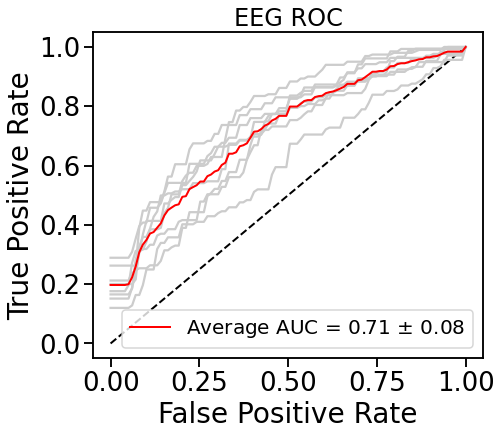

In [41]:
figure(figsize=(7,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.zeros((len(ID), 100))
mean_auc = np.zeros((len(ID), 100))
std_auc  = np.zeros((len(ID)))
indi_auc_eeg = []

for i in range(len(ID)):
    mean_tpr[i, :] = np.mean(np.asarray(tprs_eeg[10*i:10+10*i]), axis=0)
    mean_auc[i, :] = auc(mean_fpr, mean_tpr[i, :])
    std_auc[i]  = np.std(aucs_eeg[10*i:10+10*i], axis=0)
    plt.plot(mean_fpr, mean_tpr[i, :], color='0.8')
    indi_auc_eeg.append(np.mean(mean_auc[i]))

mean_tpr_all = np.mean(mean_tpr, axis=0)
mean_fpr_all = np.mean(mean_fpr, axis=0)

mean_auc_all = auc(mean_fpr, mean_tpr_all)
std_auc_all  = np.mean(std_auc, axis=0)

plt.plot(mean_fpr, mean_tpr_all, color='r',
         label=r'Average AUC = %0.2f $\pm$ %0.2f' % (mean_auc_all, std_auc_all),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.tick_params(labelsize=26)
plt.title('EEG ROC', fontsize=24)
plt.legend(loc="lower right", prop={'size': 20})

plt.show()

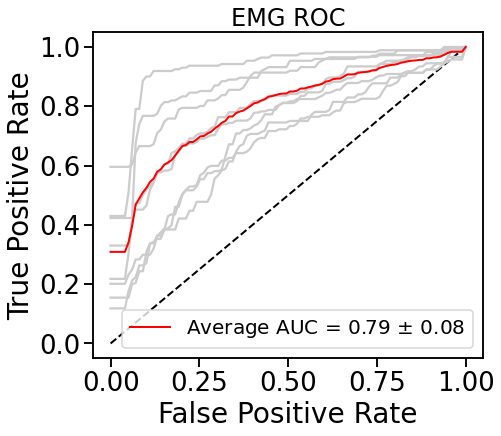

In [42]:
figure(figsize=(7,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.zeros((len(ID), 100))
mean_auc = np.zeros((len(ID), 100))
std_auc  = np.zeros((len(ID)))
indi_auc_emg = []

for i in range(len(ID)):
    mean_tpr[i, :] = np.mean(np.asarray(tprs_emg[10*i:10+10*i]), axis=0)
    mean_auc[i, :] = auc(mean_fpr, mean_tpr[i, :])
    std_auc[i]  = np.std(aucs_emg[10*i:10+10*i], axis=0)
    plt.plot(mean_fpr, mean_tpr[i, :], color='0.8')
    indi_auc_emg.append(np.mean(mean_auc[i]))
    
mean_tpr_all = np.mean(mean_tpr, axis=0)
mean_fpr_all = np.mean(mean_fpr, axis=0)

mean_auc_all = auc(mean_fpr, mean_tpr_all)
std_auc_all  = np.mean(std_auc, axis=0)

plt.plot(mean_fpr, mean_tpr_all, color='r',
         label=r'Average AUC = %0.2f $\pm$ %0.2f' % (mean_auc_all, std_auc_all),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.tick_params(labelsize=26)
plt.title('EMG ROC', fontsize=24)
plt.legend(loc="lower right", prop={'size': 20})

plt.show()

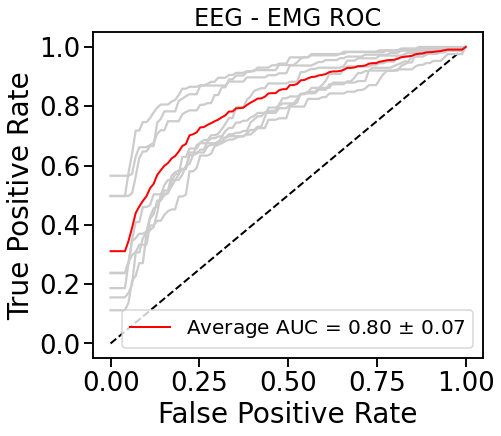

In [43]:
figure(figsize=(7,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.zeros((len(ID), 100))
mean_auc = np.zeros((len(ID), 100))
std_auc  = np.zeros((len(ID)))
indi_auc_eeg_emg = []

for i in range(len(ID)):
    mean_tpr[i, :] = np.mean(np.asarray(tprs_eeg_emg[10*i:10+10*i]), axis=0)
    mean_auc[i, :] = auc(mean_fpr, mean_tpr[i, :])
    std_auc[i]  = np.std(aucs_eeg_emg[10*i:10+10*i], axis=0)
    plt.plot(mean_fpr, mean_tpr[i, :], color='0.8')
    indi_auc_eeg_emg.append(np.mean(mean_auc[i]))
    
mean_tpr_all = np.mean(mean_tpr, axis=0)
mean_fpr_all = np.mean(mean_fpr, axis=0)

mean_auc_all = auc(mean_fpr, mean_tpr_all)
std_auc_all  = np.mean(std_auc, axis=0)

plt.plot(mean_fpr, mean_tpr_all, color='r',
         label=r'Average AUC = %0.2f $\pm$ %0.2f' % (mean_auc_all, std_auc_all),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize=28)
plt.ylabel('True Positive Rate', fontsize=28)
plt.tick_params(labelsize=26)
plt.title('EEG - EMG ROC', fontsize=24)
plt.legend(loc="lower right", prop={'size': 20})

plt.show()

In [44]:
chance = [0.5]*8
print(indi_auc_eeg)
print(indi_auc_emg)
print(indi_auc_eeg_emg)

[0.7741504329004324, 0.6789307211488584, 0.7230912956291745, 0.7353352602784423, 0.6718124576948108, 0.7650596063341163, 0.5991567460317462, 0.7440468463997872]
[0.8830742945326283, 0.7606838670254565, 0.7179080588310184, 0.877619260154911, 0.9289572315655904, 0.6782608330208951, 0.7954828926520102, 0.6703326190206995]
[0.8784145932630778, 0.7540732087352318, 0.7409966567585359, 0.8849662344570991, 0.9037110907763644, 0.7917820678346995, 0.7327778661969837, 0.7347133948591639]


In [45]:
from scipy import stats
stats.ttest_ind(indi_auc_eeg, chance)

Ttest_indResult(statistic=10.254075544243223, pvalue=6.840030943815454e-08)

In [46]:
stats.ttest_ind(indi_auc_emg, chance)

Ttest_indResult(statistic=8.262235801884437, pvalue=9.389108480007001e-07)

In [47]:
stats.ttest_ind(indi_auc_eeg_emg, chance)

Ttest_indResult(statistic=11.542836266806338, pvalue=1.537400309086075e-08)